In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df_esperanza_mujeres = pd.read_csv("Esperanza_vida_mujeres.csv")  # Cargamos el datase "Esperanza_vida_mujeres.csv"
df_esperanza_hombres = pd.read_csv("Esperanza_vida_hombres.csv")  # Cargamos el datase "Esperanza_vida_hombres.csv"
df_esperanza_general = pd.read_csv("Esperanza_vida_general.csv")  # Cargamos el datase "Esperanza_vida_general.csv"
df_homicidios = pd.read_csv("Homicidios.csv")  # Cargamos el datase "Homicidios.csv"
df_desempleo = pd.read_csv("Desempleo.csv")  # Cargamos el datase "Desempleo.csv"
df_gasto_educacion = pd.read_csv("Gasto_educacion.csv")  # Cargamos el datase "Gasto_educacion.csv"
df_pib = pd.read_csv("PIB.csv")  # Cargamos el datase "PIB.csv"
df_tasa_nacimientos = pd.read_csv("Tasa_nacimientos.csv")  # Cargamos el datase "Tasa_nacimientos.csv"
df_tasa_mortalidad = pd.read_csv("Tasa_mortalidad.csv")  # Cargamos el datase "Tasa_mortalidad.csv"
df_tasa_mortalidad_infantil = pd.read_csv("Tasa_mortalidad_infantil.csv")  # Cargamos el datase "Tasa_mortalidad_infantil.csv"

In [241]:
Fact_valor = pd.concat([df_esperanza_mujeres,df_esperanza_hombres,df_esperanza_general,df_homicidios,df_desempleo,df_gasto_educacion,df_pib,df_tasa_nacimientos,df_tasa_mortalidad,df_tasa_mortalidad_infantil], axis='index')
Fact_valor

,Codigo_Pais,Nombre_Pais,Codigo_Serie,Nombre_Serie,Año,value
0,ARG,Argentina,SP.DYN.LE00.FE.IN,"Esperanza de vida al nacer, mujeres (años)",1992,75.719
1,ATG,Antigua y Barbuda,SP.DYN.LE00.FE.IN,"Esperanza de vida al nacer, mujeres (años)",1992,75.941
2,BHS,Bahamas,SP.DYN.LE00.FE.IN,"Esperanza de vida al nacer, mujeres (años)",1992,73.859
3,BLZ,Belice,SP.DYN.LE00.FE.IN,"Esperanza de vida al nacer, mujeres (años)",1992,71.462
4,BOL,Bolivia,SP.DYN.LE00.FE.IN,"Esperanza de vida al nacer, mujeres (años)",1992,59.093
...,...,...,...,...,...,...
1045,TTO,Trinidad y Tobago,SP.DYN.IMRT.IN,Tasa de mortalidad infantil (por 1000 nacimien...,2021,14.600
1046,URY,Uruguay,SP.DYN.IMRT.IN,Tasa de mortalidad infantil (por 1000 nacimien...,2021,5.000
1047,USA,Estados Unidos de América,SP.DYN.IMRT.IN,Tasa de mortalidad infantil (por 1000 nacimien...,2021,5.400
1048,VCT,San Vicente y las Granadinas,SP.DYN.IMRT.IN,Tasa de mortalidad infantil (por 1000 nacimien...,2021,12.600


In [242]:
Dim_pais = Fact_valor[['Codigo_Pais', 'Nombre_Pais']].drop_duplicates(ignore_index = True)
Dim_pais

,Codigo_Pais,Nombre_Pais
0,ARG,Argentina
1,ATG,Antigua y Barbuda
2,BHS,Bahamas
3,BLZ,Belice
4,BOL,Bolivia
5,BRA,Brasil
6,BRB,Barbados
7,CAN,Canadá
8,CHL,Chile
9,COL,Colombia


In [243]:
Dim_serie = Fact_valor[['Codigo_Serie', 'Nombre_Serie']].drop_duplicates(ignore_index = True)
Dim_serie

,Codigo_Serie,Nombre_Serie
0,SP.DYN.LE00.FE.IN,"Esperanza de vida al nacer, mujeres (años)"
1,SP.DYN.LE00.MA.IN,"Esperanza de vida al nacer, hombres (años)"
2,SP.DYN.LE00.IN,"Esperanza de vida al nacer, total (años)"
3,VC.IHR.PSRC.P5,Homicidios dolosos (por cada 100.000 habitantes)
4,SL.UEM.TOTL.ZS,"Desempleo, total (% de la población activa tot..."
5,NY.ADJ.AEDU.CD,Ahorro ajustado: Gasto en educación (US$ a pre...
6,NY.GDP.MKTP.CD,PIB (US$ a precios actuales)
7,SP.DYN.CBRT.IN,Tasa de nacimientos (por 1000 habitantes)
8,SP.DYN.CDRT.IN,"Tasa de mortalidad, cruda (por 1000 habitantes)"
9,SP.DYN.IMRT.IN,Tasa de mortalidad infantil (por 1000 nacimien...


In [244]:
Dim_valorSerie = Fact_valor.groupby(['Codigo_Serie', 'Año'])['value'].mean()  # Calcula el promedio de la serie por año
Dim_valorSerie = pd.DataFrame(Dim_valorSerie.reset_index())
Dim_valorSerie

,Codigo_Serie,Año,value
0,NY.ADJ.AEDU.CD,1992,1.231153e+10
1,NY.ADJ.AEDU.CD,1993,1.230290e+10
2,NY.ADJ.AEDU.CD,1994,1.395366e+10
3,NY.ADJ.AEDU.CD,1995,1.344654e+10
4,NY.ADJ.AEDU.CD,1996,1.447243e+10
...,...,...,...
295,VC.IHR.PSRC.P5,2017,2.094417e+01
296,VC.IHR.PSRC.P5,2018,1.826872e+01
297,VC.IHR.PSRC.P5,2019,1.739558e+01
298,VC.IHR.PSRC.P5,2020,1.634108e+01


In [245]:
esperanza_vida_mujeres = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'SP.DYN.LE00.FE.IN'].reset_index(drop=True).rename(columns={'value':'valor_evm'})
esperanza_vida_hombres = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'SP.DYN.LE00.MA.IN'].reset_index(drop=True).rename(columns={'value':'valor_evh'})
esperanza_vida_total = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'SP.DYN.LE00.IN'].reset_index(drop=True).rename(columns={'value':'valor_evt'})
homicidios = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'VC.IHR.PSRC.P5'].reset_index(drop=True).rename(columns={'value':'valor_hom'})
desempleo = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'SL.UEM.TOTL.ZS'].reset_index(drop=True).rename(columns={'value':'valor_des'})
gasto_educacion = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'NY.ADJ.AEDU.CD'].reset_index(drop=True).rename(columns={'value':'valor_ge'})
pib = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'NY.GDP.MKTP.CD'].reset_index(drop=True).rename(columns={'value':'valor_pib'})
nacimientos = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'SP.DYN.CBRT.IN'].reset_index(drop=True).rename(columns={'value':'valor_nac'})
mortalidad = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'SP.DYN.CDRT.IN'].reset_index(drop=True).rename(columns={'value':'valor_mor'})
mortalidad_infantil = Dim_valorSerie.loc[Dim_valorSerie['Codigo_Serie'] == 'SP.DYN.IMRT.IN'].reset_index(drop=True).rename(columns={'value':'valor_mi'})

<function matplotlib.pyplot.show(close=None, block=None)>

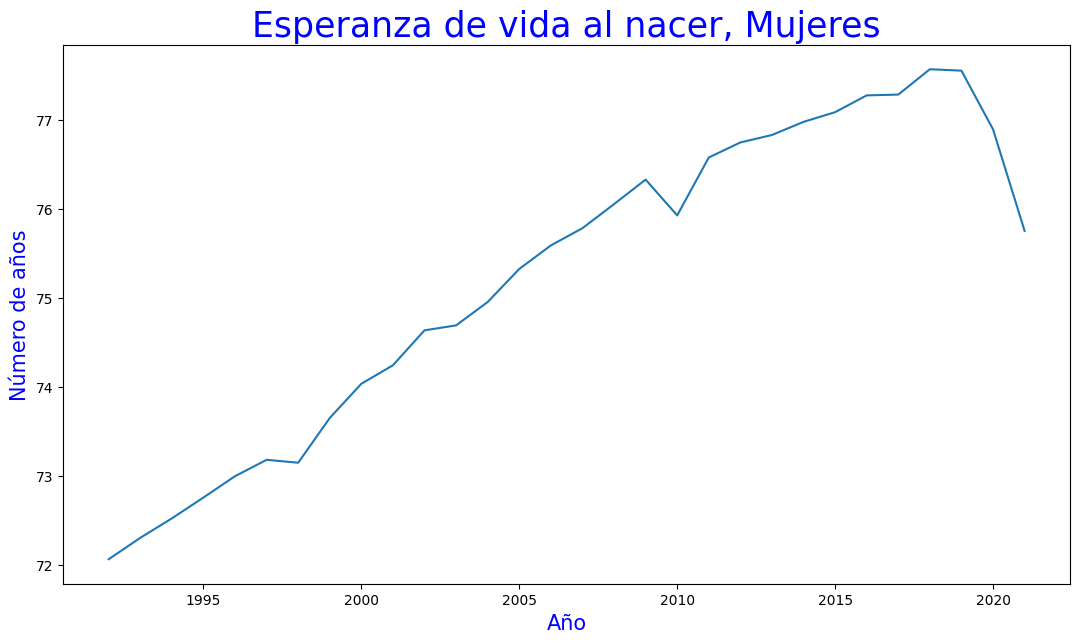

In [246]:
plt.figure(figsize=(13,7))
plt.plot(esperanza_vida_mujeres['Año'], esperanza_vida_mujeres['valor_evm'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de años', fontsize=15, color='blue')
plt.title('Esperanza de vida al nacer, Mujeres', fontsize=25, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

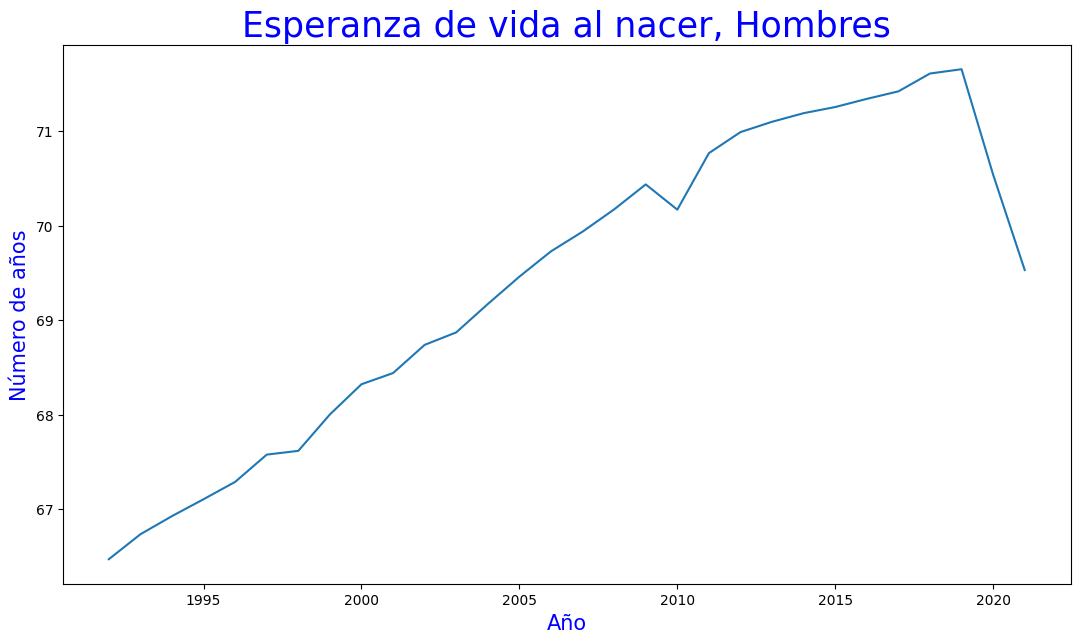

In [247]:
plt.figure(figsize=(13,7))
plt.plot(esperanza_vida_hombres['Año'], esperanza_vida_hombres['valor_evh'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de años', fontsize=15, color='blue')
plt.title('Esperanza de vida al nacer, Hombres', fontsize=25, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

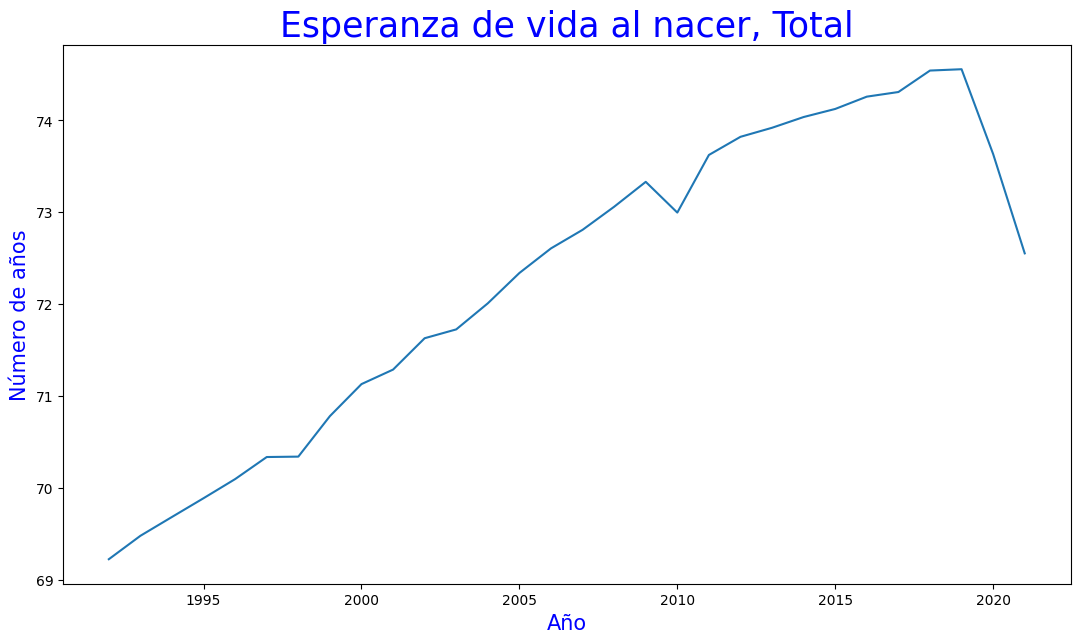

In [248]:
plt.figure(figsize=(13,7))
plt.plot(esperanza_vida_total['Año'], esperanza_vida_total['valor_evt'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de años', fontsize=15, color='blue')
plt.title('Esperanza de vida al nacer, Total', fontsize=25, color='blue')
plt.show

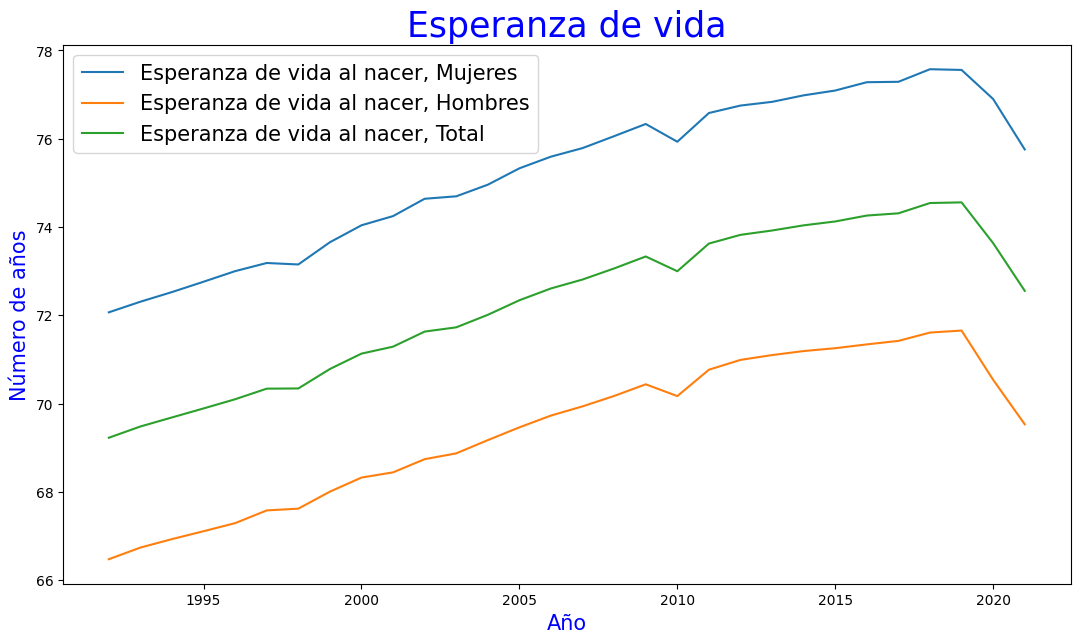

In [249]:
plt.figure(figsize=(13,7))
plt.plot(esperanza_vida_mujeres['Año'], esperanza_vida_mujeres['valor_evm'], label='Esperanza de vida al nacer, Mujeres')  # Diagrama de líneas
plt.plot(esperanza_vida_hombres['Año'], esperanza_vida_hombres['valor_evh'], label='Esperanza de vida al nacer, Hombres')  # Diagrama de líneas
plt.plot(esperanza_vida_total['Año'], esperanza_vida_total['valor_evt'], label='Esperanza de vida al nacer, Total')  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de años', fontsize=15, color='blue')
plt.title('Esperanza de vida', fontsize=25, color='blue')
plt.legend(fontsize=15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

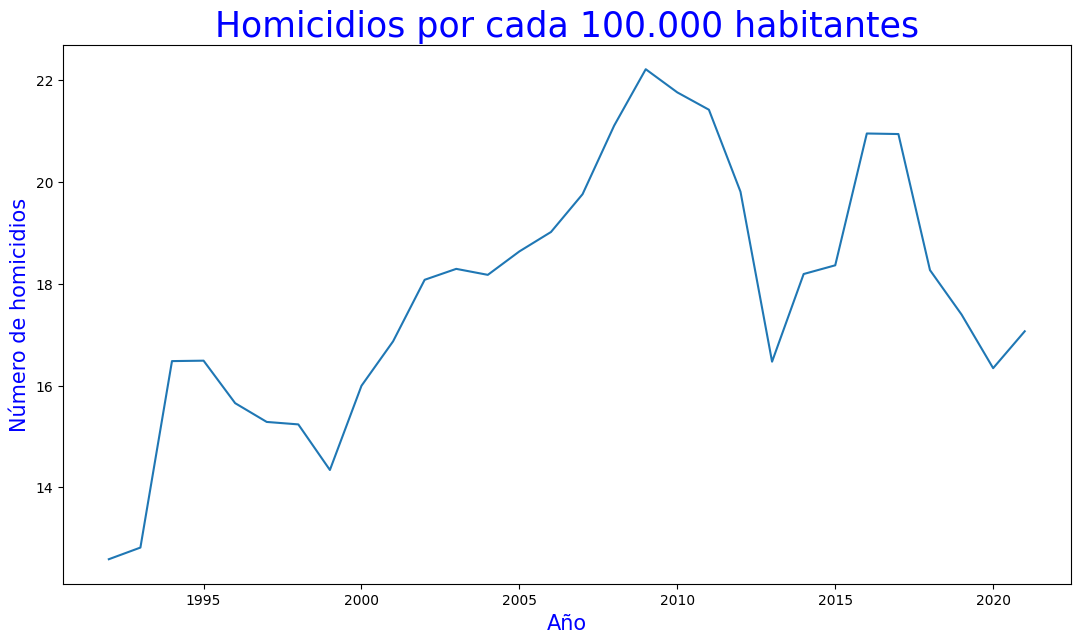

In [250]:
plt.figure(figsize=(13,7))
plt.plot(homicidios['Año'], homicidios['valor_hom'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de homicidios', fontsize=15, color='blue')
plt.title('Homicidios por cada 100.000 habitantes', fontsize=25, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

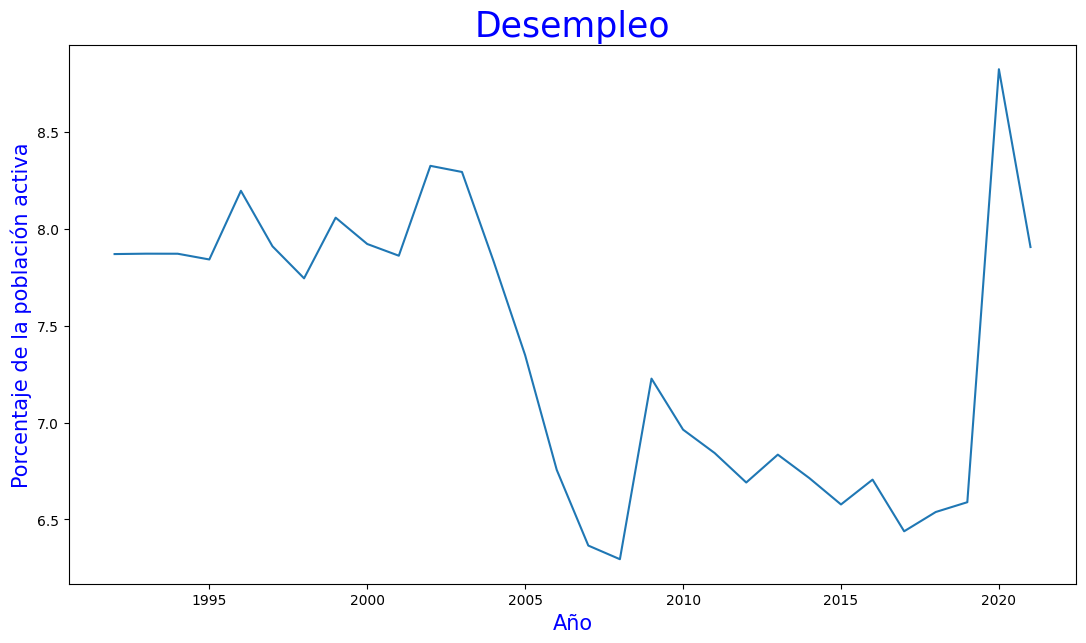

In [251]:
plt.figure(figsize=(13,7))
plt.plot(desempleo['Año'], desempleo['valor_des'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Porcentaje de la población activa', fontsize=15, color='blue')
plt.title('Desempleo', fontsize=25, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

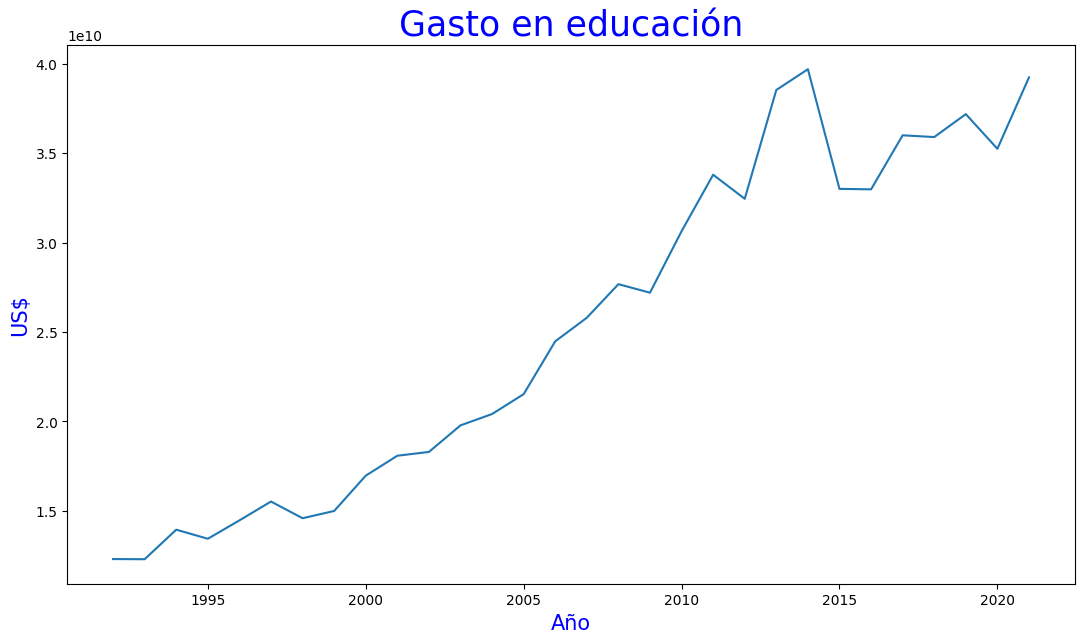

In [252]:
plt.figure(figsize=(13,7))
plt.plot(gasto_educacion['Año'], gasto_educacion['valor_ge'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('US$', fontsize=15, color='blue')
plt.title('Gasto en educación', fontsize=25, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

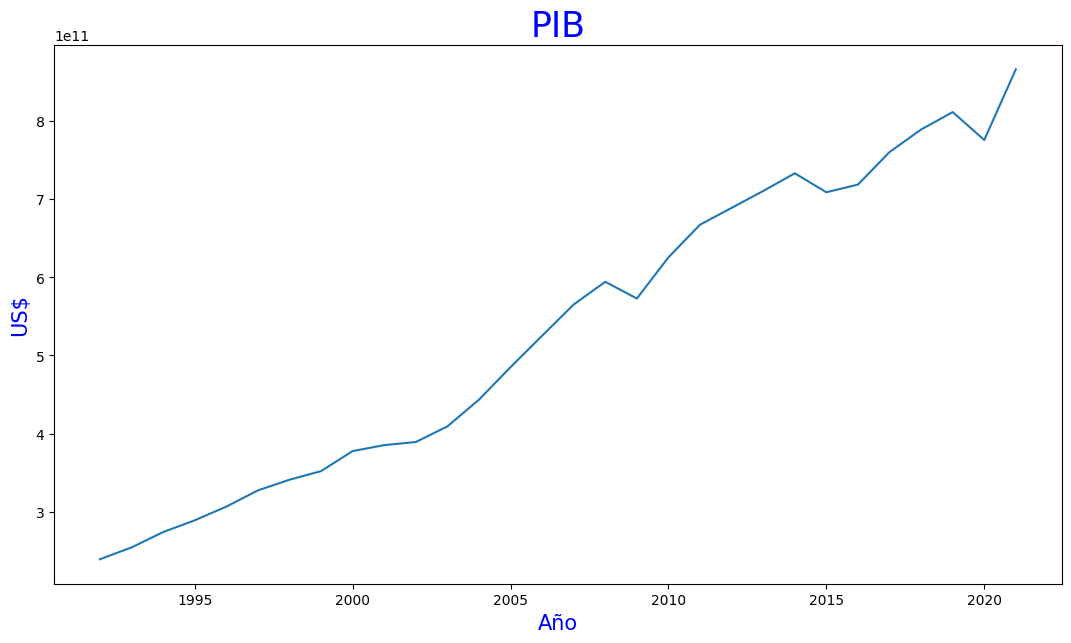

In [253]:
plt.figure(figsize=(13,7))
plt.plot(pib['Año'], pib['valor_pib'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('US$', fontsize=15, color='blue')
plt.title('PIB', fontsize=25, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

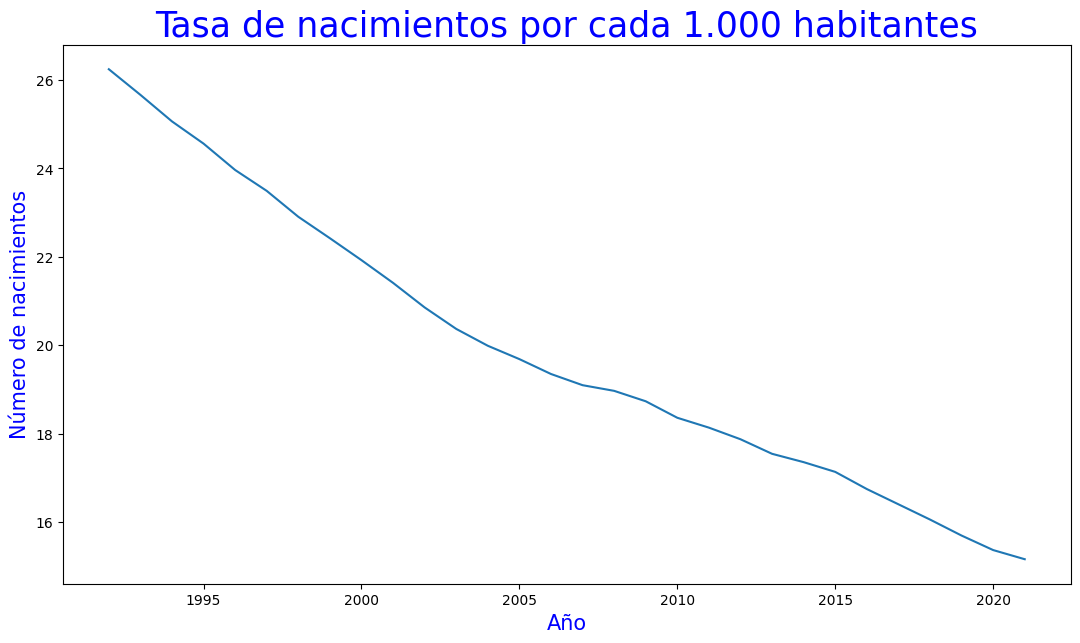

In [254]:
plt.figure(figsize=(13,7))
plt.plot(nacimientos['Año'], nacimientos['valor_nac'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de nacimientos', fontsize=15, color='blue')
plt.title('Tasa de nacimientos por cada 1.000 habitantes', fontsize=25, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

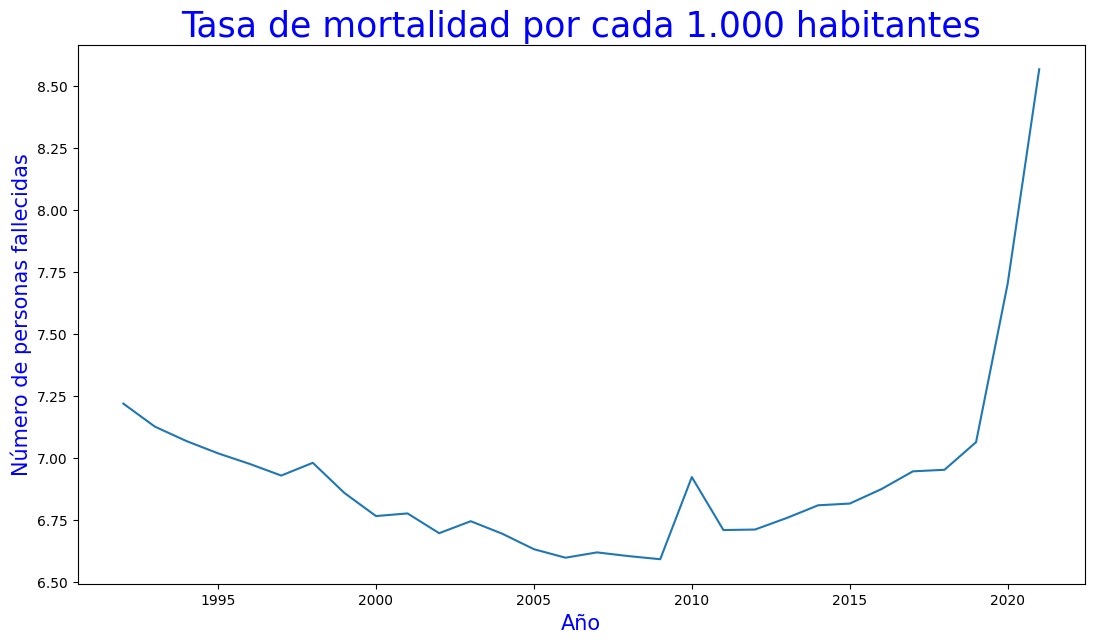

In [255]:
plt.figure(figsize=(13,7))
plt.plot(mortalidad['Año'], mortalidad['valor_mor'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de personas fallecidas', fontsize=15, color='blue')
plt.title('Tasa de mortalidad por cada 1.000 habitantes', fontsize=25, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

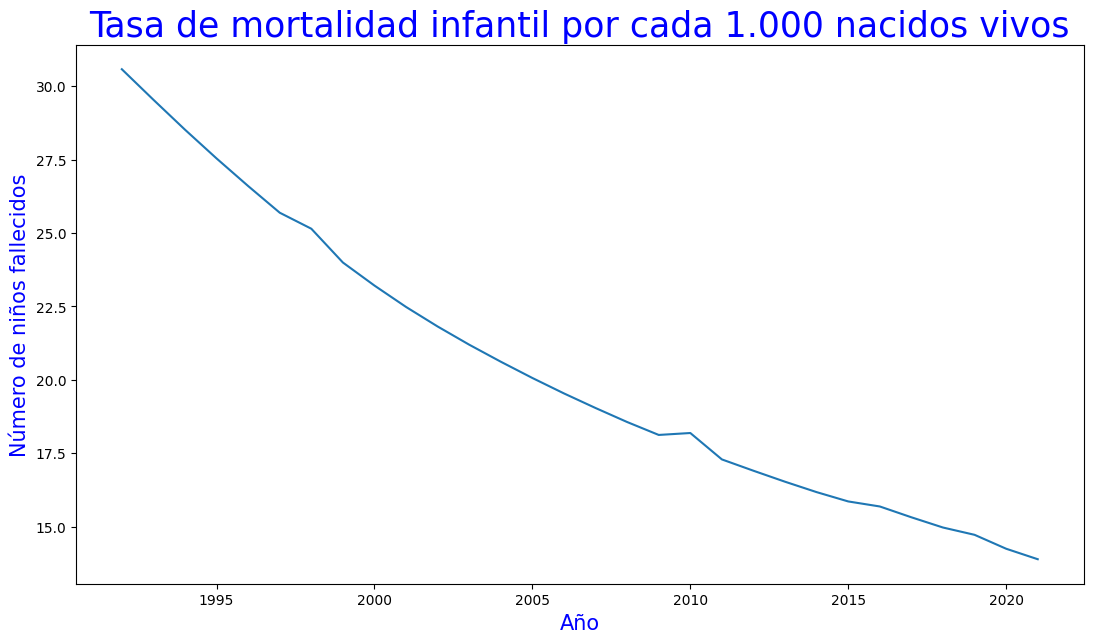

In [256]:
plt.figure(figsize=(13,7))
plt.plot(mortalidad_infantil['Año'], mortalidad_infantil['valor_mi'])  # Diagrama de líneas
plt.xticks(rotation='horizontal')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de niños fallecidos', fontsize=15, color='blue')
plt.title('Tasa de mortalidad infantil por cada 1.000 nacidos vivos', fontsize=25, color='blue')
plt.show

In [257]:
df_corr = pd.concat([esperanza_vida_mujeres['valor_evm'],esperanza_vida_hombres['valor_evh'],esperanza_vida_total['valor_evt'],homicidios['valor_hom'],desempleo['valor_des'],gasto_educacion['valor_ge'],pib['valor_pib'],nacimientos['valor_nac'],mortalidad['valor_mor'],mortalidad_infantil['valor_mi']],axis=1)
df_corr

,valor_evm,valor_evh,valor_evt,valor_hom,valor_des,valor_ge,valor_pib,valor_nac,valor_mor,valor_mi
0,72.066743,66.472829,69.225346,12.585030,7.869200,1.231153e+10,2.391620e+11,26.244057,7.218057,30.582857
1,72.307229,66.736743,69.480268,12.814126,7.871200,1.230290e+10,2.542500e+11,25.664400,7.125086,29.542857
2,72.525743,66.928686,69.685406,16.480135,7.870914,1.395366e+10,2.739009e+11,25.063771,7.066914,28.522857
3,72.760229,67.107343,69.889408,16.488527,7.841286,1.344654e+10,2.889649e+11,24.560943,7.017429,27.542857
4,72.999943,67.290486,70.097545,15.653073,8.195657,1.447243e+10,3.064706e+11,23.964429,6.974800,26.602857
5,73.184371,67.578886,70.337506,15.284064,7.909257,1.552669e+10,3.272569e+11,23.492400,6.927771,25.694286
6,73.151171,67.618771,70.341861,15.235803,7.744000,1.459368e+10,3.409273e+11,22.906657,6.979229,25.148571
7,73.654571,68.003800,70.782684,14.339618,8.057086,1.499934e+10,3.519366e+11,22.421400,6.857571,23.997143
8,74.038914,68.323029,71.131183,15.995243,7.921200,1.697086e+10,3.775889e+11,21.925371,6.764371,23.211429
9,74.247286,68.441171,71.288961,16.868447,7.860714,1.808584e+10,3.852659e+11,21.411400,6.774971,22.482857


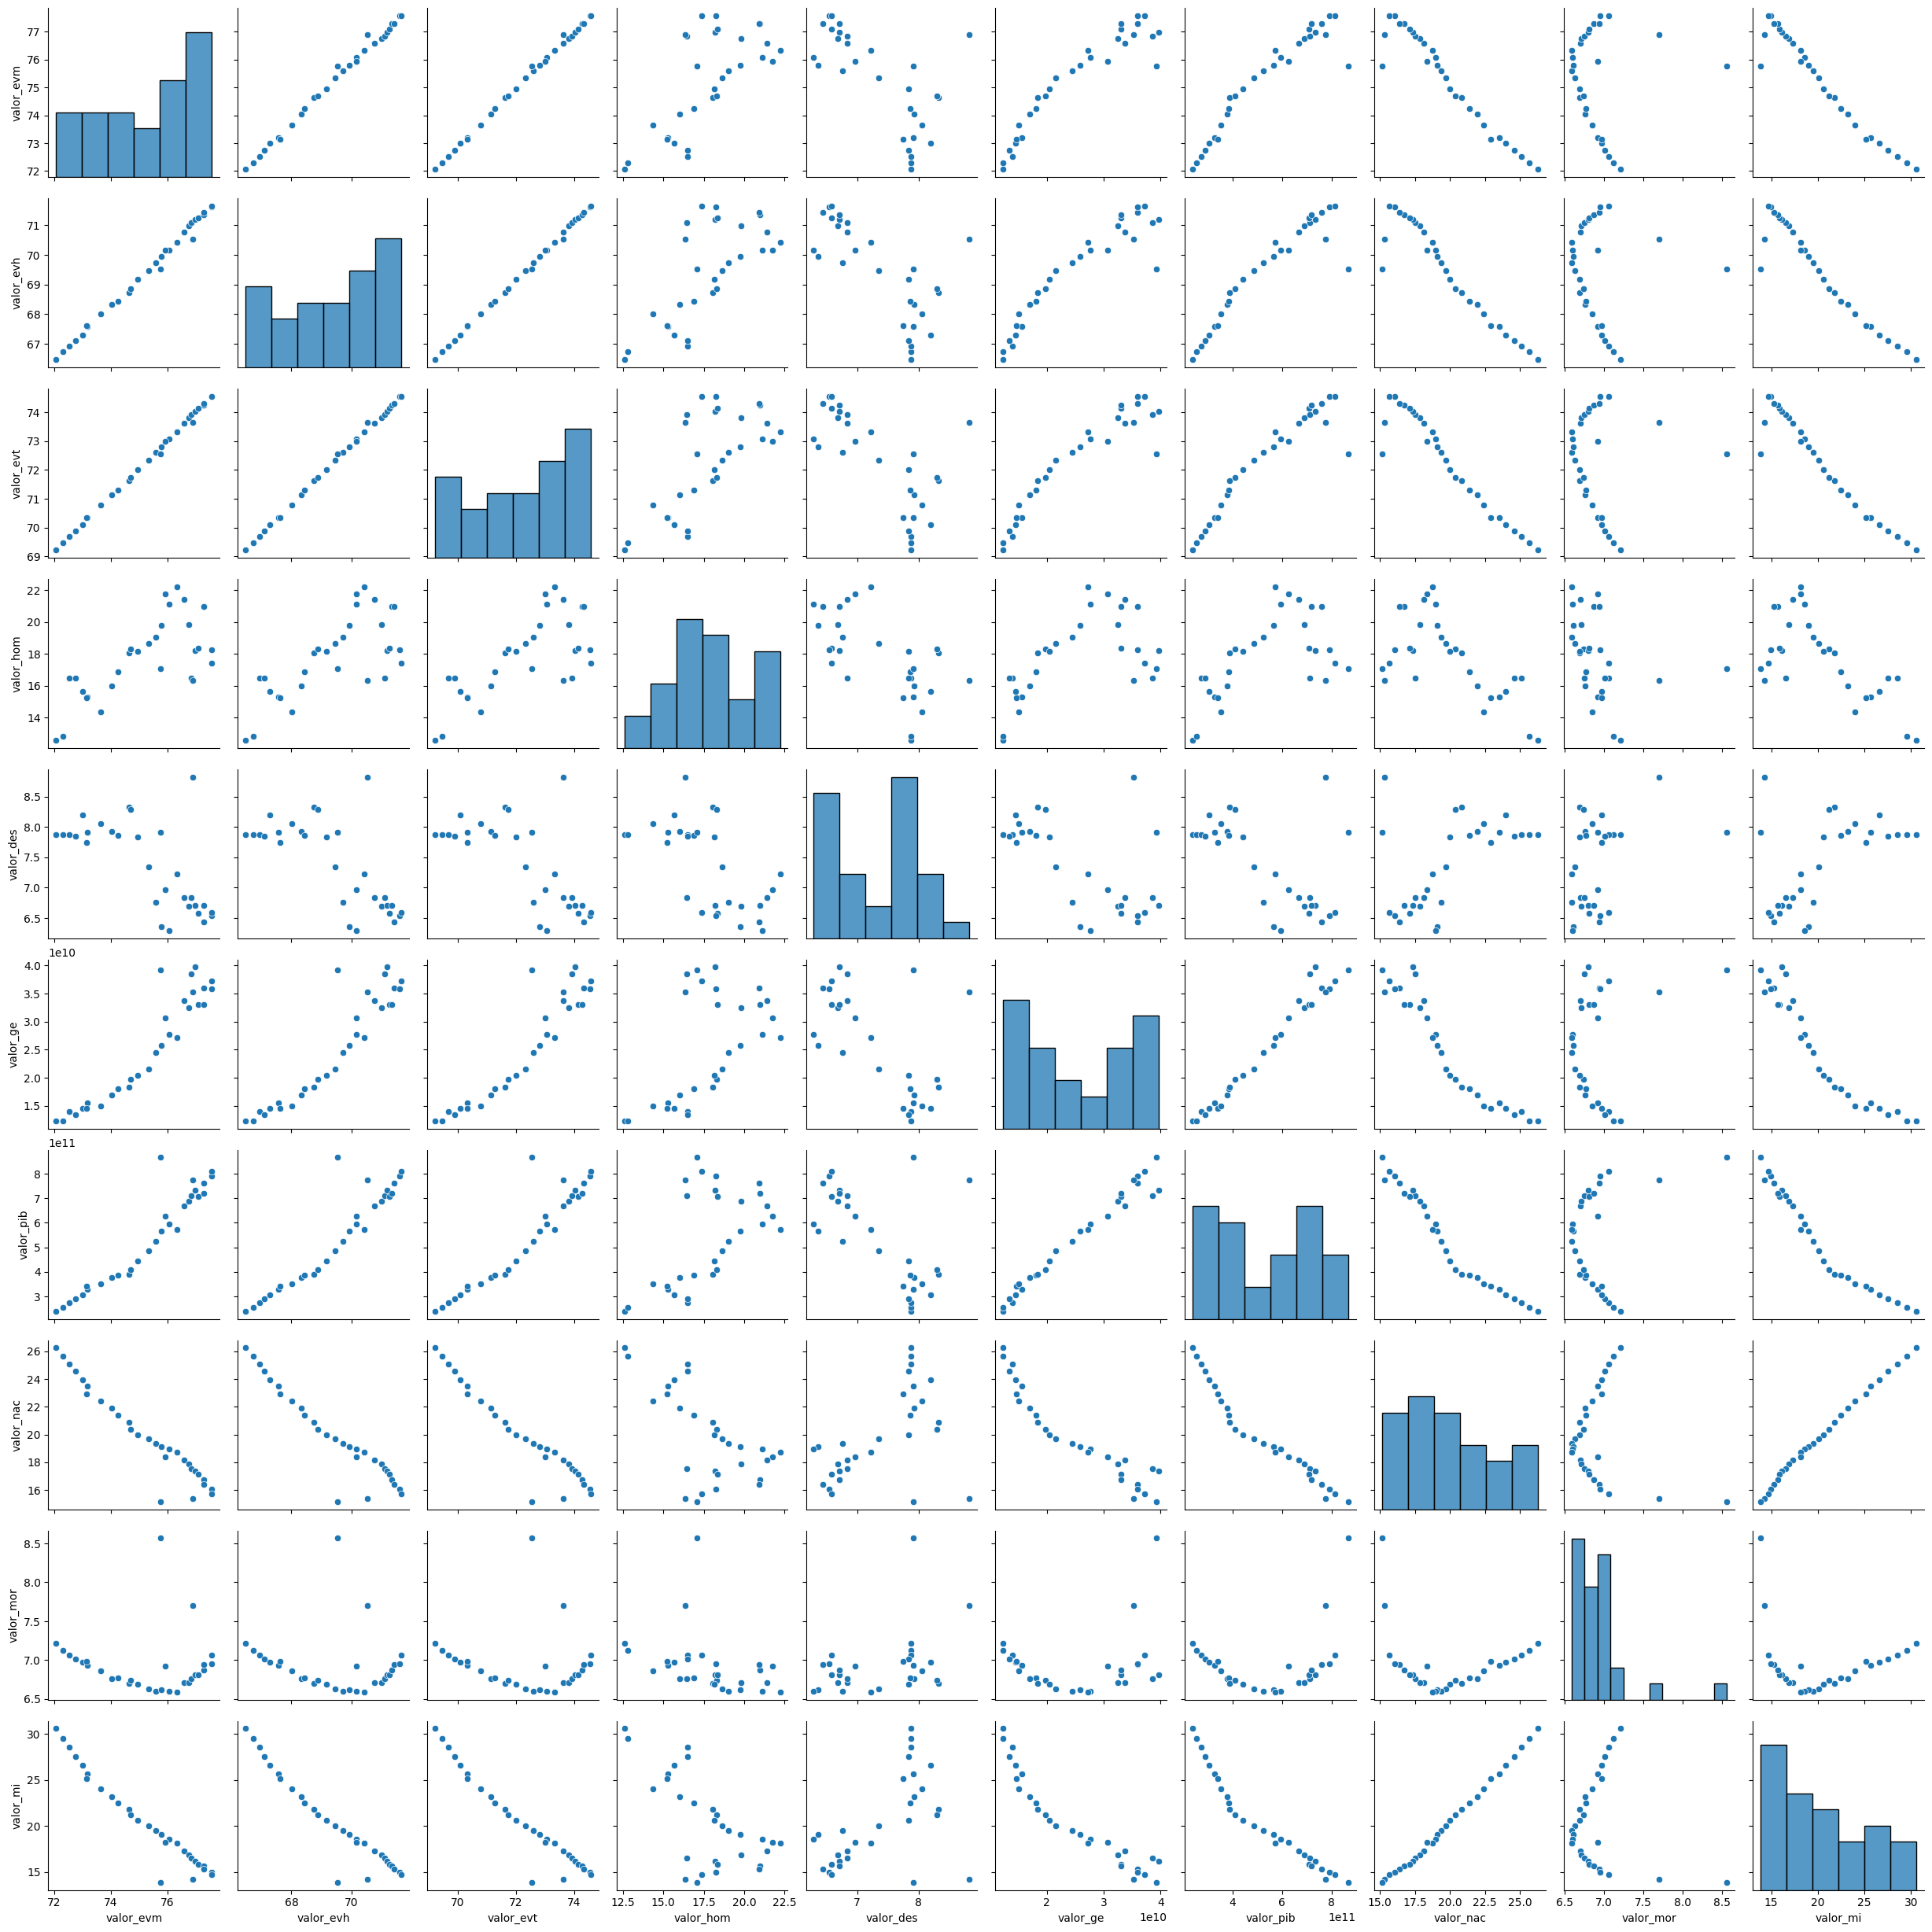

In [258]:
sns.pairplot(df_corr)

In [259]:
df_corr.corr()

,valor_evm,valor_evh,valor_evt,valor_hom,valor_des,valor_ge,valor_pib,valor_nac,valor_mor,valor_mi
valor_evm,1.000000,0.996765,0.999005,0.708592,-0.667456,0.936080,0.944176,-0.962924,-0.070896,-0.970812
valor_evh,0.996765,1.000000,0.999353,0.713822,-0.707398,0.928509,0.930023,-0.944006,-0.123212,-0.954808
valor_evt,0.999005,0.999353,1.000000,0.712046,-0.690396,0.932293,0.936826,-0.952913,-0.100524,-0.962397
valor_hom,0.708592,0.713822,0.712046,1.000000,-0.626683,0.569633,0.574761,-0.638310,-0.356343,-0.666641
valor_des,-0.667456,-0.707398,-0.690396,-0.626683,1.000000,-0.608616,-0.588613,0.524447,0.379160,0.547651
valor_ge,0.936080,0.928509,0.932293,0.569633,-0.608616,1.000000,0.985129,-0.943602,0.193889,-0.941811
valor_pib,0.944176,0.930023,0.936826,0.574761,-0.588613,0.985129,1.000000,-0.971594,0.240430,-0.965160
valor_nac,-0.962924,-0.944006,-0.952913,-0.638310,0.524447,-0.943602,-0.971594,1.000000,-0.148233,0.997400
valor_mor,-0.070896,-0.123212,-0.100524,-0.356343,0.379160,0.193889,0.240430,-0.148233,1.000000,-0.096665
valor_mi,-0.970812,-0.954808,-0.962397,-0.666641,0.547651,-0.941811,-0.965160,0.997400,-0.096665,1.000000


Text(0.5, 1.0, 'Esperanza de vida (Años)   Vs.   Homicidios (por 100.000 habitantes)')

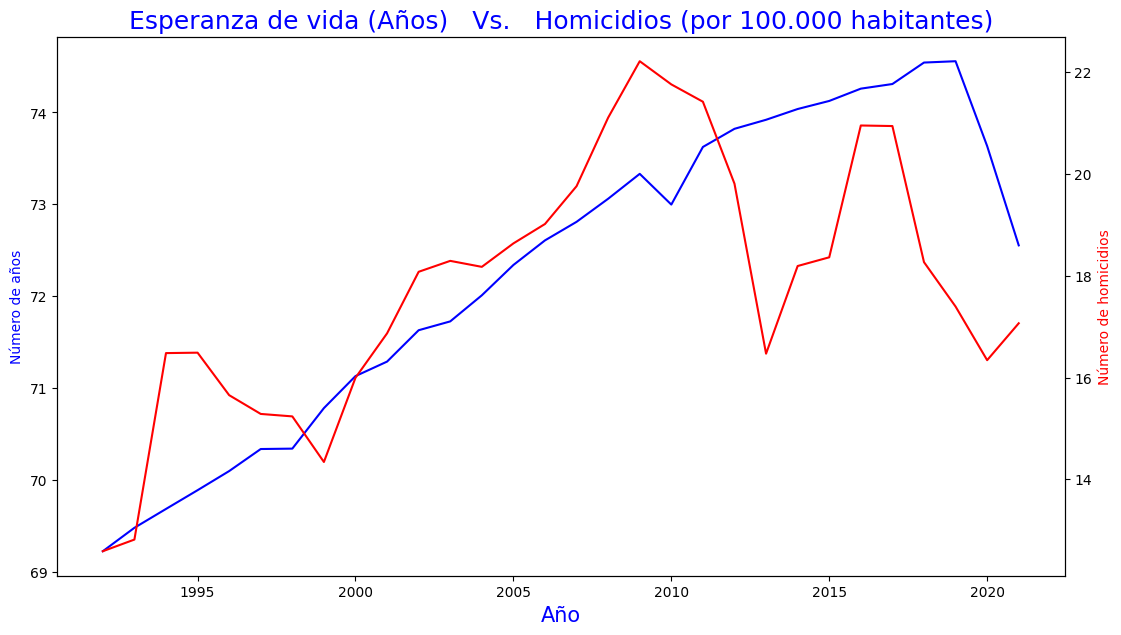

In [260]:
fig, ax1 = plt.subplots(figsize=(13,7))
ax1.plot(esperanza_vida_total['Año'], esperanza_vida_total['valor_evt'], color='blue')  # Diagrama de líneas
ax1.set_ylabel('Número de años', color='blue')
ax2 = ax1.twinx()
ax2.plot(homicidios['Año'], homicidios['valor_hom'], color='red')  # Diagrama de líneas
ax2.set_ylabel('Número de homicidios', color='red')
ax1.set_xlabel('Año', fontsize=15, color='blue')
ax1.set_title('Esperanza de vida (Años)   Vs.   Homicidios (por 100.000 habitantes)', fontsize=18, color='blue')


In [261]:
Dim_valorSeriePais = Fact_valor.groupby(['Codigo_Serie', 'Codigo_Pais'])['value'].mean()  # Calcula el promedio de la serie por año
Dim_valorSeriePais = pd.DataFrame(Dim_valorSeriePais.reset_index())
Dim_valorSeriePais

,Codigo_Serie,Codigo_Pais,value
0,NY.ADJ.AEDU.CD,ARG,1.584977e+10
1,NY.ADJ.AEDU.CD,ATG,2.706736e+07
2,NY.ADJ.AEDU.CD,BHS,3.333446e+08
3,NY.ADJ.AEDU.CD,BLZ,8.693431e+07
4,NY.ADJ.AEDU.CD,BOL,1.083790e+09
...,...,...,...
345,VC.IHR.PSRC.P5,TTO,2.200612e+01
346,VC.IHR.PSRC.P5,URY,7.232118e+00
347,VC.IHR.PSRC.P5,USA,5.863787e+00
348,VC.IHR.PSRC.P5,VCT,1.896687e+01


In [262]:
Fact_valorRegion = pd.DataFrame({'Codigo_Pais': ["ATG", "ARG", "BHS", "BRB", "BLZ", "BOL", "BRA", "CAN", "CHL", "COL", "CRI", "CUB", "DMA", "DOM", "ECU", "SLV", "GRD", "GTM", "GUY", "HTI", "HND", "JAM", "MEX", "NIC", "PAN", "PRY", "PER", "KNA", "LCA", "VCT", "SUR", "TTO", "URY", "VEN", "USA"],
                           'Codigo_Region': ['AC', 'AS', 'AC', 'AC','AC','AS', 'AS', 'AN', 'AS', 'AS', 'AC', 'AC', 'AC', 'AC', 'AS', 'AC', 'AC', 'AC', 'AS', 'AC', 'AC', 'AC', 'AN', 'AC', 'AC', 'AS', 'AS', 'AC', 'AC', 'AC', 'AS', 'AS', 'AS', 'AS', 'AN']})

In [263]:
Fact_valorRegion = pd.merge(Fact_valorRegion, Fact_valor, on='Codigo_Pais')
Fact_valorRegion.drop(['Nombre_Pais', 'Nombre_Serie'], axis=1, inplace=True)  # Eliminamos la columna 'Nombre_Pais' y 'Nombre_Serie'
Fact_valorRegion

,Codigo_Pais,Codigo_Region,Codigo_Serie,Año,value
0,ATG,AC,SP.DYN.LE00.FE.IN,1992,75.941
1,ATG,AC,SP.DYN.LE00.FE.IN,1993,75.835
2,ATG,AC,SP.DYN.LE00.FE.IN,1994,76.063
3,ATG,AC,SP.DYN.LE00.FE.IN,1995,76.222
4,ATG,AC,SP.DYN.LE00.FE.IN,1996,76.542
...,...,...,...,...,...
10495,USA,AN,SP.DYN.IMRT.IN,2017,5.700
10496,USA,AN,SP.DYN.IMRT.IN,2018,5.600
10497,USA,AN,SP.DYN.IMRT.IN,2019,5.500
10498,USA,AN,SP.DYN.IMRT.IN,2020,5.400


In [264]:
Dim_region = pd.DataFrame({'Codigo_Region': ['AN', 'AC', 'AS'],
                           'Nombre_Region': ['América del Norte', 'América Central', 'América del Sur']})
Dim_Region               

,Codigo_Region,Nombre_Region
0,AN,América del Norte
1,AC,América Central
2,AS,América del Sur


In [265]:
Dim_pais = pd.merge(Dim_pais, Fact_valorRegion, on='Codigo_Pais')
Dim_pais.drop(['Codigo_Serie', 'Año', 'value'], axis=1, inplace=True)  # Eliminamos la columna 'Nombre_Pais' y 'Nombre_Serie'
Dim_pais = Dim_pais.drop_duplicates(ignore_index = True)
Dim_pais

,Codigo_Pais,Nombre_Pais,Codigo_Region
0,ARG,Argentina,AS
1,ARG,Argentina,AS
2,ARG,Argentina,AS
3,ARG,Argentina,AS
4,ARG,Argentina,AS
...,...,...,...
10495,VEN,Venezuela,AS
10496,VEN,Venezuela,AS
10497,VEN,Venezuela,AS
10498,VEN,Venezuela,AS


In [267]:
Fact_valor.drop(['Nombre_Pais', 'Nombre_Serie'], axis=1, inplace=True)  # Eliminamos la columna 'Nombre_Pais'


In [277]:
Fact_valor

,Codigo_Pais,Codigo_Serie,Año,value
0,ARG,SP.DYN.LE00.FE.IN,1992,75.719
1,ATG,SP.DYN.LE00.FE.IN,1992,75.941
2,BHS,SP.DYN.LE00.FE.IN,1992,73.859
3,BLZ,SP.DYN.LE00.FE.IN,1992,71.462
4,BOL,SP.DYN.LE00.FE.IN,1992,59.093
...,...,...,...,...
1045,TTO,SP.DYN.IMRT.IN,2021,14.600
1046,URY,SP.DYN.IMRT.IN,2021,5.000
1047,USA,SP.DYN.IMRT.IN,2021,5.400
1048,VCT,SP.DYN.IMRT.IN,2021,12.600


In [278]:
Dim_pais

,Codigo_Pais,Nombre_Pais,Codigo_Region
0,ARG,Argentina,AS
1,ATG,Antigua y Barbuda,AC
2,BHS,Bahamas,AC
3,BLZ,Belice,AC
4,BOL,Bolivia,AS
5,BRA,Brasil,AS
6,BRB,Barbados,AC
7,CAN,Canadá,AN
8,CHL,Chile,AS
9,COL,Colombia,AS


In [279]:
Dim_serie

,Codigo_Serie,Nombre_Serie
0,SP.DYN.LE00.FE.IN,"Esperanza de vida al nacer, mujeres (años)"
1,SP.DYN.LE00.MA.IN,"Esperanza de vida al nacer, hombres (años)"
2,SP.DYN.LE00.IN,"Esperanza de vida al nacer, total (años)"
3,VC.IHR.PSRC.P5,Homicidios dolosos (por cada 100.000 habitantes)
4,SL.UEM.TOTL.ZS,"Desempleo, total (% de la población activa tot..."
5,NY.ADJ.AEDU.CD,Ahorro ajustado: Gasto en educación (US$ a pre...
6,NY.GDP.MKTP.CD,PIB (US$ a precios actuales)
7,SP.DYN.CBRT.IN,Tasa de nacimientos (por 1000 habitantes)
8,SP.DYN.CDRT.IN,"Tasa de mortalidad, cruda (por 1000 habitantes)"
9,SP.DYN.IMRT.IN,Tasa de mortalidad infantil (por 1000 nacimien...


In [271]:
Dim_valorSerie

,Codigo_Serie,Año,value
0,NY.ADJ.AEDU.CD,1992,1.231153e+10
1,NY.ADJ.AEDU.CD,1993,1.230290e+10
2,NY.ADJ.AEDU.CD,1994,1.395366e+10
3,NY.ADJ.AEDU.CD,1995,1.344654e+10
4,NY.ADJ.AEDU.CD,1996,1.447243e+10
...,...,...,...
295,VC.IHR.PSRC.P5,2017,2.094417e+01
296,VC.IHR.PSRC.P5,2018,1.826872e+01
297,VC.IHR.PSRC.P5,2019,1.739558e+01
298,VC.IHR.PSRC.P5,2020,1.634108e+01


In [272]:
Dim_valorSeriePais

,Codigo_Serie,Codigo_Pais,value
0,NY.ADJ.AEDU.CD,ARG,1.584977e+10
1,NY.ADJ.AEDU.CD,ATG,2.706736e+07
2,NY.ADJ.AEDU.CD,BHS,3.333446e+08
3,NY.ADJ.AEDU.CD,BLZ,8.693431e+07
4,NY.ADJ.AEDU.CD,BOL,1.083790e+09
...,...,...,...
345,VC.IHR.PSRC.P5,TTO,2.200612e+01
346,VC.IHR.PSRC.P5,URY,7.232118e+00
347,VC.IHR.PSRC.P5,USA,5.863787e+00
348,VC.IHR.PSRC.P5,VCT,1.896687e+01


In [273]:
Fact_valorRegion

,Codigo_Pais,Codigo_Region,Codigo_Serie,Año,value
0,ATG,AC,SP.DYN.LE00.FE.IN,1992,75.941
1,ATG,AC,SP.DYN.LE00.FE.IN,1993,75.835
2,ATG,AC,SP.DYN.LE00.FE.IN,1994,76.063
3,ATG,AC,SP.DYN.LE00.FE.IN,1995,76.222
4,ATG,AC,SP.DYN.LE00.FE.IN,1996,76.542
...,...,...,...,...,...
10495,USA,AN,SP.DYN.IMRT.IN,2017,5.700
10496,USA,AN,SP.DYN.IMRT.IN,2018,5.600
10497,USA,AN,SP.DYN.IMRT.IN,2019,5.500
10498,USA,AN,SP.DYN.IMRT.IN,2020,5.400


In [274]:
Dim_region

,Codigo_Region,Nombre_Region
0,AN,América del Norte
1,AC,América Central
2,AS,América del Sur


In [280]:
# Tablas de Hechos y de Dimensiones a considerar en el proyecto:
Fact_valor.to_csv("Fact_valor.csv", index = False)
Dim_pais.to_csv("Dim_pais.csv", index = False)
Dim_serie.to_csv("Dim_serie.csv", index = False)
Dim_valorSerie.to_csv("Dim_valorSerie.csv", index = False)
Dim_valorSeriePais.to_csv("Dim_valorSeriePais.csv", index = False)
Fact_valorRegion.to_csv("Fact_valorRegion.csv", index = False)
Dim_region.to_csv("Dim_region.csv", index = False)